In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.duplicated().sum()

0

In [7]:
df['Postal Code'].isna().sum()

11

In [8]:
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [11]:
if df.duplicated().sum() > 0:
    print("Duplicates are present in the data.")
else:
    print("No duplicates Found.")

No duplicates Found.


Univariate Analysis

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import cufflinks as cf

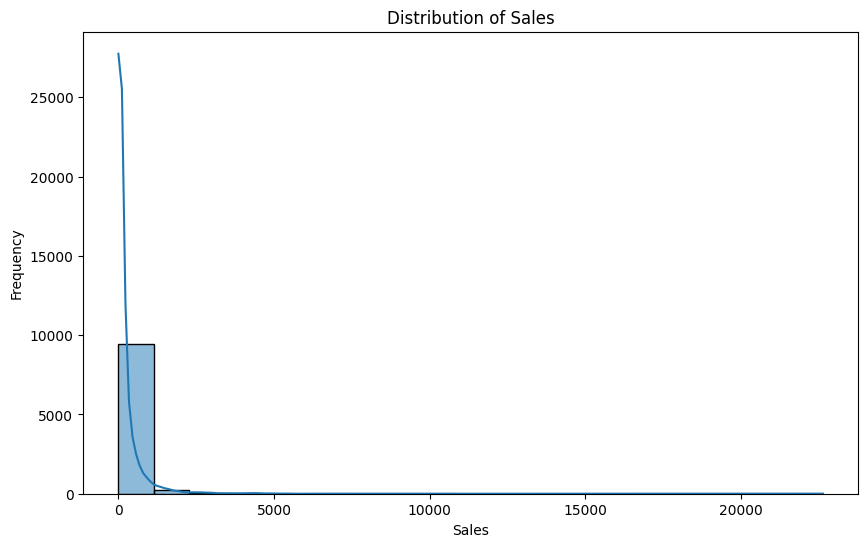

In [20]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

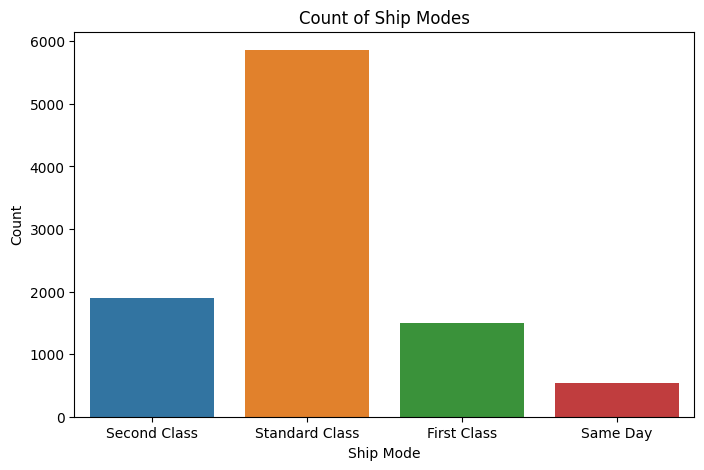

In [21]:
# Bar chart of Ship Mode counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship Mode', data=df)
plt.title('Count of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

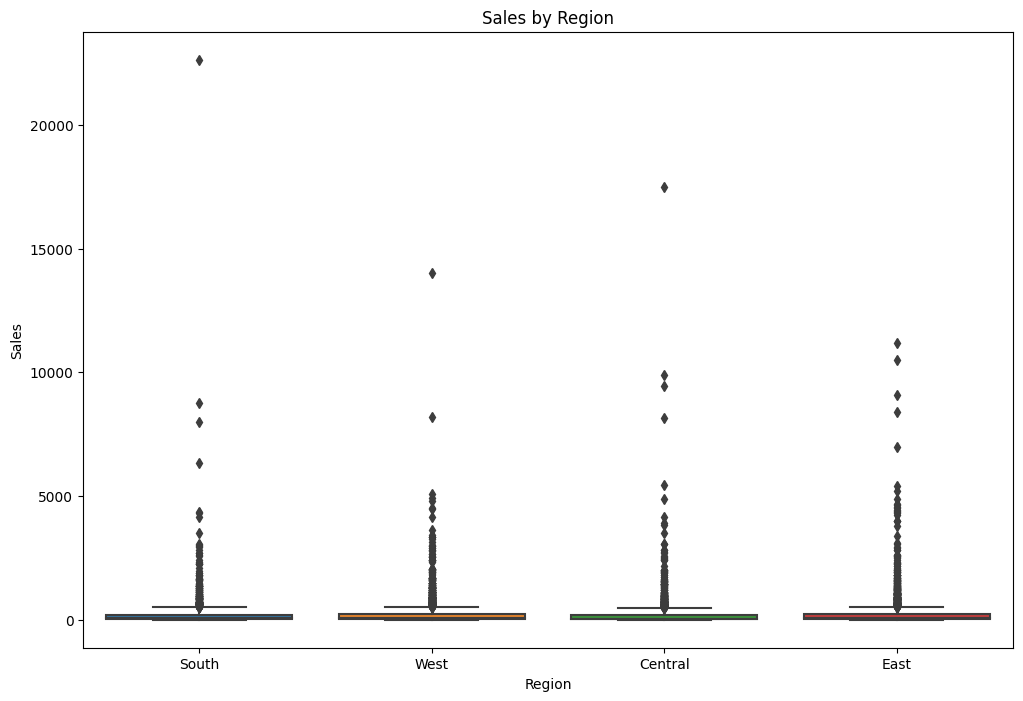

In [22]:
# Boxplot of Sales by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

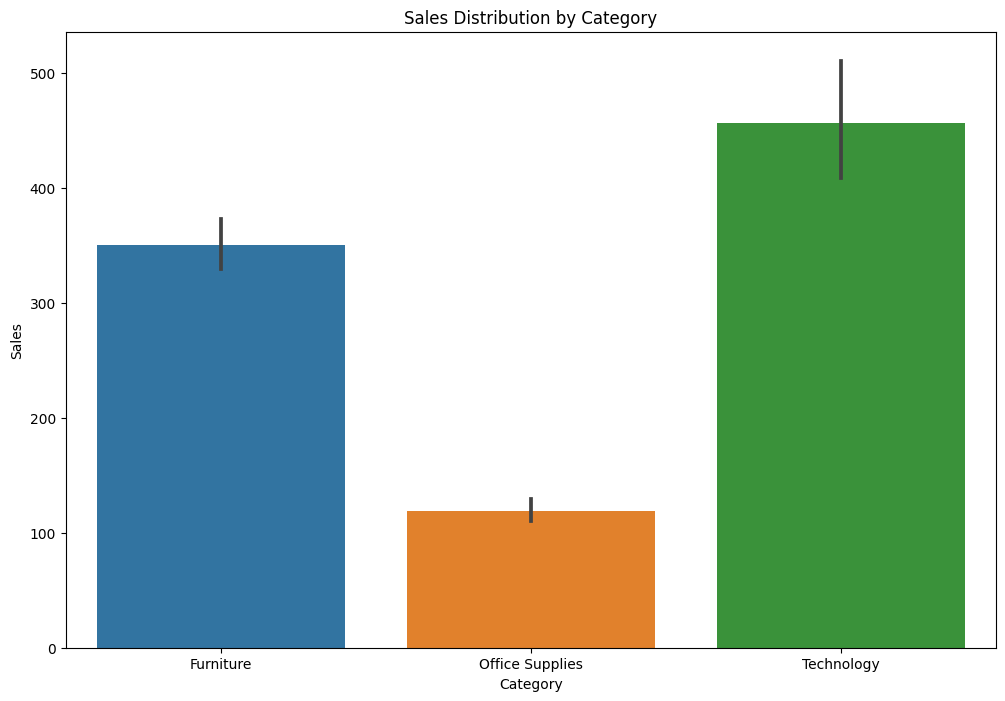

In [25]:
# Violin plot of Sales distribution by Category
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

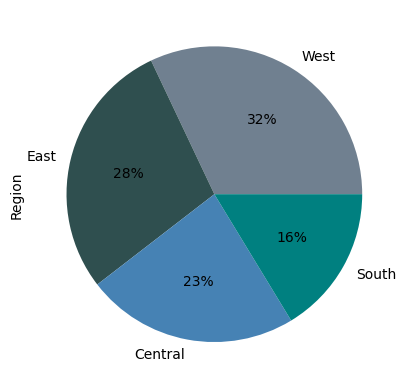

In [27]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
df['Region'].value_counts().plot.pie(subplots=True,autopct='%1.0f%%',colors=color_list);

Bivariate Analysis

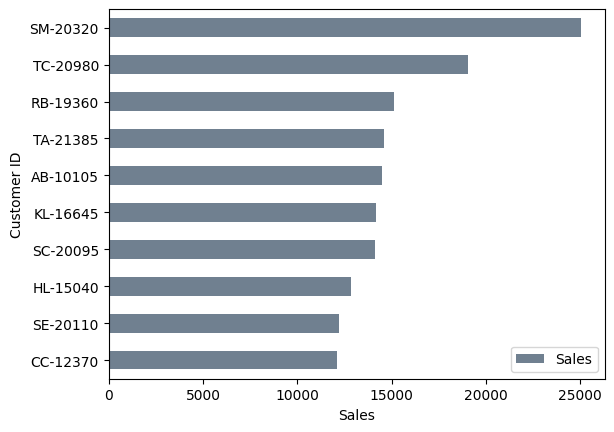

In [29]:
Top_customers = df.groupby("Customer ID").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).head(10).plot.barh(color= color_list)
plt.gca().invert_yaxis()
plt.xlabel('Sales');

The top 10 Customer who bought the product maybe at high amount or product which have high cost here Customer ID SM-20320 is on top


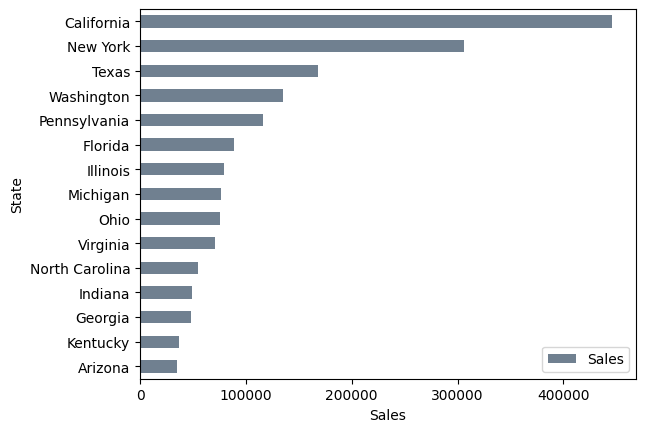

In [30]:
Top_States= df.groupby("State").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color= color_list)
plt.gca().invert_yaxis()
plt.xlabel('Sales');

Above chart shows top 15 States from which California is the on the top in terms of the Sales

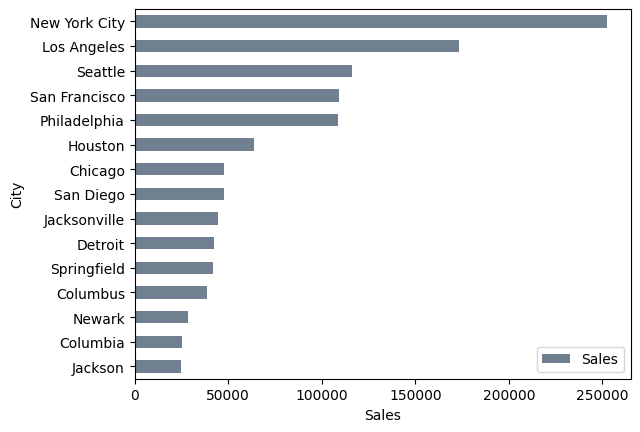

In [31]:
top_cities= df.groupby("City").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color='slategray')
plt.gca().invert_yaxis()
plt.xlabel('Sales');

Most of the sales are done by New York City

Describe the Dataset
Get the total counts, mean, std and other valuable descriptions using describe()
Also, get the correlation

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9800.0,55211.280918,32076.677954,0.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
year,9794.0,2016.724423,1.124135,2015.000,2016.000,2017.00,2018.000,2018.00
month,9794.0,7.184501,3.424308,1.000,4.000,8.00,10.000,12.00


In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Row ID,Postal Code,Sales,year,month
Row ID,1.000000,0.011298,0.001151,0.018717,-0.010338
Postal Code,0.011298,1.000000,-0.025756,0.005536,0.027330
Sales,0.001151,-0.025756,1.000000,-0.010631,-0.009982
year,0.018717,0.005536,-0.010631,1.000000,-0.048466
month,-0.010338,0.027330,-0.009982,-0.048466,1.000000


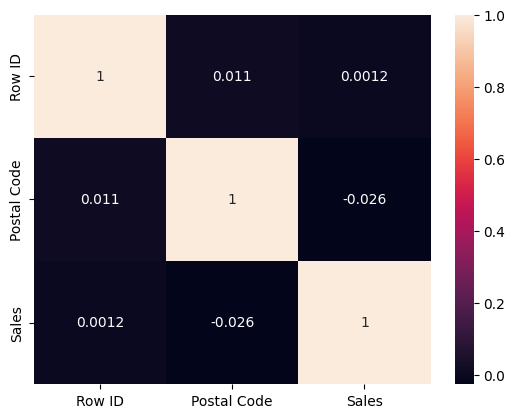

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

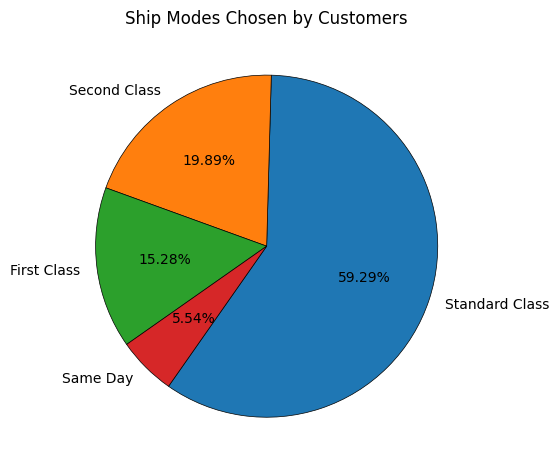

In [38]:
# Create a new df of total sales of ship mode and count of ship modes columns
ship_mode_df = df.groupby('Ship Mode').sum(numeric_only=True).sort_values('Sales', ascending=False)
ship_mode_df = ship_mode_df[['Sales']]
ship_mode_df['Count'] = df['Ship Mode'].value_counts()
ship_mode_df.reset_index(inplace=True)

plt.pie(ship_mode_df['Sales'], labels=ship_mode_df['Ship Mode'], autopct='%1.2f%%',
        startangle=235, wedgeprops={'edgecolor':'black','linewidth':0.5})
plt.title('Ship Modes Chosen by Customers')
plt.tight_layout()
plt.show()

Monthly Sales

In [43]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

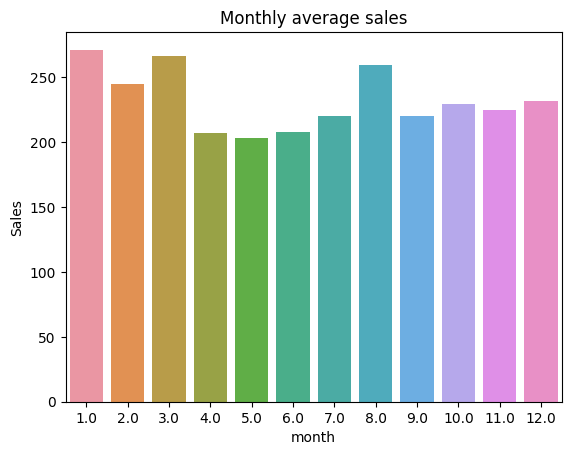

In [44]:
data_monthly_avg = df.groupby(['month']).agg({'Sales': 'mean'}).reset_index()
sns.barplot(x='month', y='Sales', data=data_monthly_avg).set(title="Monthly average sales");

 Sales over the years

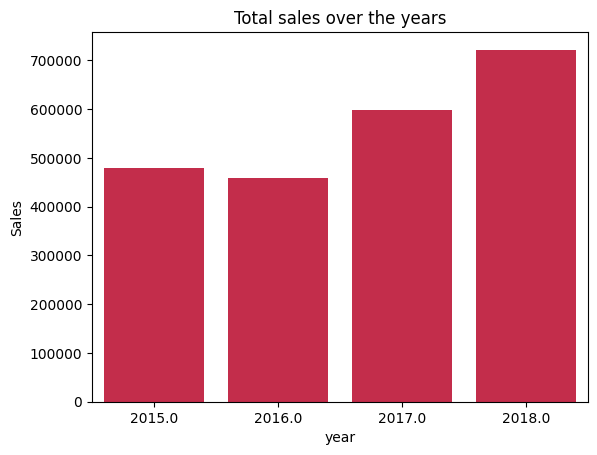

In [45]:
data_year=df.groupby('year').agg({'Sales': 'sum'}).reset_index()
ax= sns.barplot(x='year', y='Sales', data=data_year, color="crimson").set(title="Total sales over the years");

Sales By Region

<Axes: xlabel='Region', ylabel='Sales'>

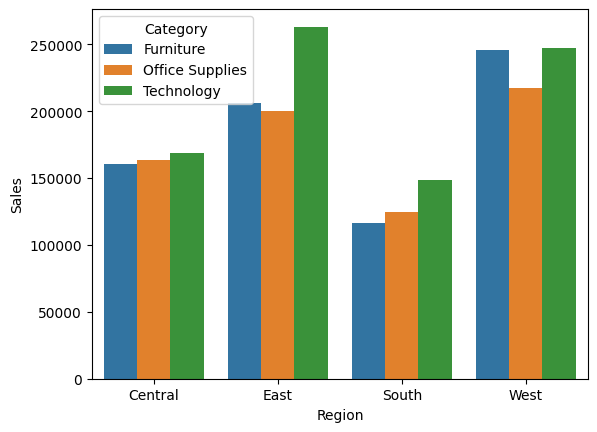

In [46]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "sum"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")

In [64]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

<ipython-input-64-52a363fcaee4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



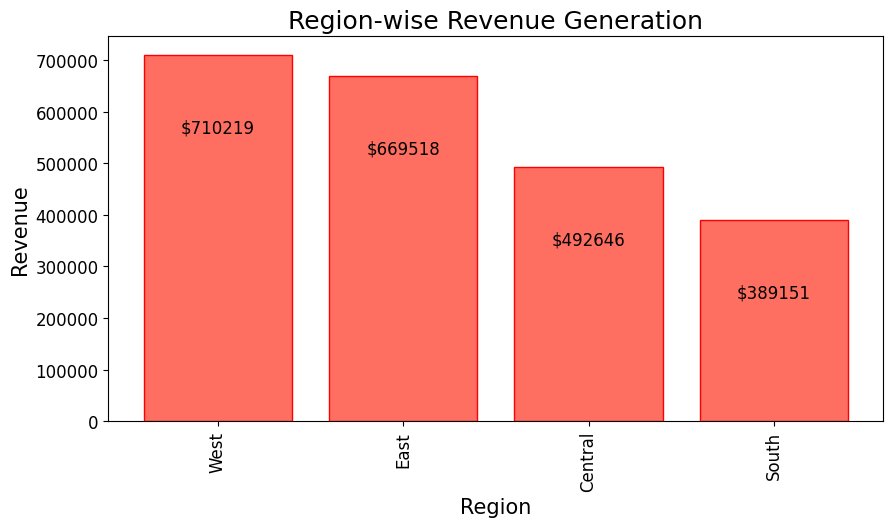

In [65]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Region-wise Revenue Generation", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) # x axis shows the Region
plt.ylabel("Revenue",fontsize=15) # y axis show the Revenue generated
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items():
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');